In [1]:
import pandas as pd
from tensorflow import keras 
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import seaborn as sns
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.metrics import (classification_report, confusion_matrix, 
                            f1_score,accuracy_score, precision_score, 
                             recall_score, roc_auc_score)

In [2]:
df_train =  pd.read_csv('train.csv')
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test =  pd.read_csv('test.csv')
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#X = df_train.drop("label" , axis=1)
#y = df_train.label

In [5]:
#X_train , X_test , y_train , y_test = train_test_split(X,y, stratify=y , test_size=0.20 , random_state=100)

In [6]:
#(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [7]:
y = df_train['label']

#Dropping Label Column
X = df_train.drop(labels=['label'],axis=1)



In [8]:
X.isnull().any().describe()

df_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
X = X/255
df_test = df_test/255

In [10]:
X.shape

(42000, 784)

In [11]:
X = X.values.reshape(-1,28,28,1)
X

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [12]:
# df_test = df_test.values.reshape(-1,28,28,1)

In [13]:
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [14]:
X.shape

(42000, 28, 28, 1)

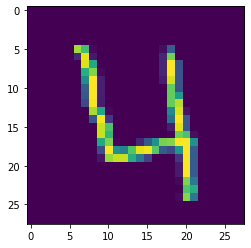

In [15]:
plt.imshow(X[3])

In [16]:
y.shape

(42000,)

In [17]:
y = tf.keras.utils.to_categorical(y, num_classes=10)

In [18]:
y.shape

(42000, 10)

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=42 , test_size=0.3)

In [20]:
X_train.shape

(29400, 28, 28, 1)

In [21]:
y_train.shape

(29400, 10)

In [22]:
input_shape = X_train.shape[1:]

In [23]:
input_shape

(28, 28, 1)

In [24]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.50))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.50))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.30))

model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.30)) 

model.add(Dense(10))
model.add(Activation("softmax"))

In [25]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [26]:
history = model.fit(X_train , y_train , epochs=20 , batch_size=100 , validation_split=0.3)

#0 , batch_size=50 , 

Epoch 1/20
206/206 [==============================] - 67s 313ms/step - loss: 1.9085 - accuracy: 0.2930 - val_loss: 0.9850 - val_accuracy: 0.7524
Epoch 2/20
206/206 [==============================] - 60s 289ms/step - loss: 1.0282 - accuracy: 0.6466 - val_loss: 0.4335 - val_accuracy: 0.8990
Epoch 3/20
206/206 [==============================] - 60s 290ms/step - loss: 0.6994 - accuracy: 0.7804 - val_loss: 0.2594 - val_accuracy: 0.9340
Epoch 4/20
206/206 [==============================] - 68s 330ms/step - loss: 0.5719 - accuracy: 0.8288 - val_loss: 0.2089 - val_accuracy: 0.9456
Epoch 5/20
206/206 [==============================] - 55s 268ms/step - loss: 0.4740 - accuracy: 0.8624 - val_loss: 0.1649 - val_accuracy: 0.9558
Epoch 6/20
206/206 [==============================] - 96s 469ms/step - loss: 0.4440 - accuracy: 0.8756 - val_loss: 0.1475 - val_accuracy: 0.9579
Epoch 7/20
206/206 [==============================] - 78s 375ms/step - loss: 0.3992 - accuracy: 0.8861 - val_loss: 0.1397 - val_ac

In [27]:
y_predicted = model.predict(X_test)

In [28]:
y_pred = np.argmax(y_predicted,axis=1)
y_true = np.argmax(y_test,axis=1)

In [29]:
print(classification_report(y_true , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1200
           1       0.99      0.99      0.99      1389
           2       0.97      0.95      0.96      1294
           3       0.97      0.97      0.97      1355
           4       0.98      0.98      0.98      1222
           5       0.97      0.98      0.98      1085
           6       0.98      0.99      0.98      1256
           7       0.96      0.97      0.97      1359
           8       0.99      0.97      0.98      1209
           9       0.96      0.97      0.97      1231

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



<AxesSubplot:>

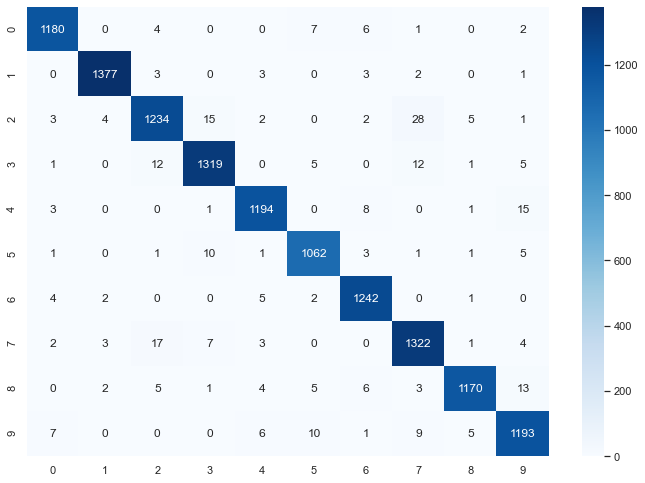

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues', fmt='g')

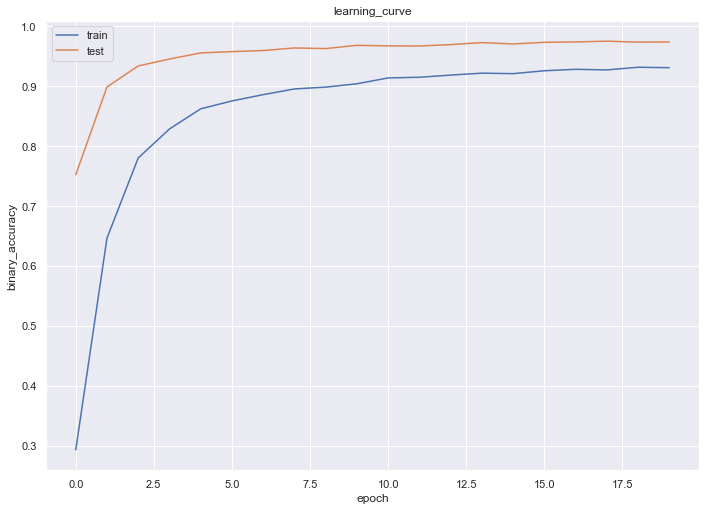

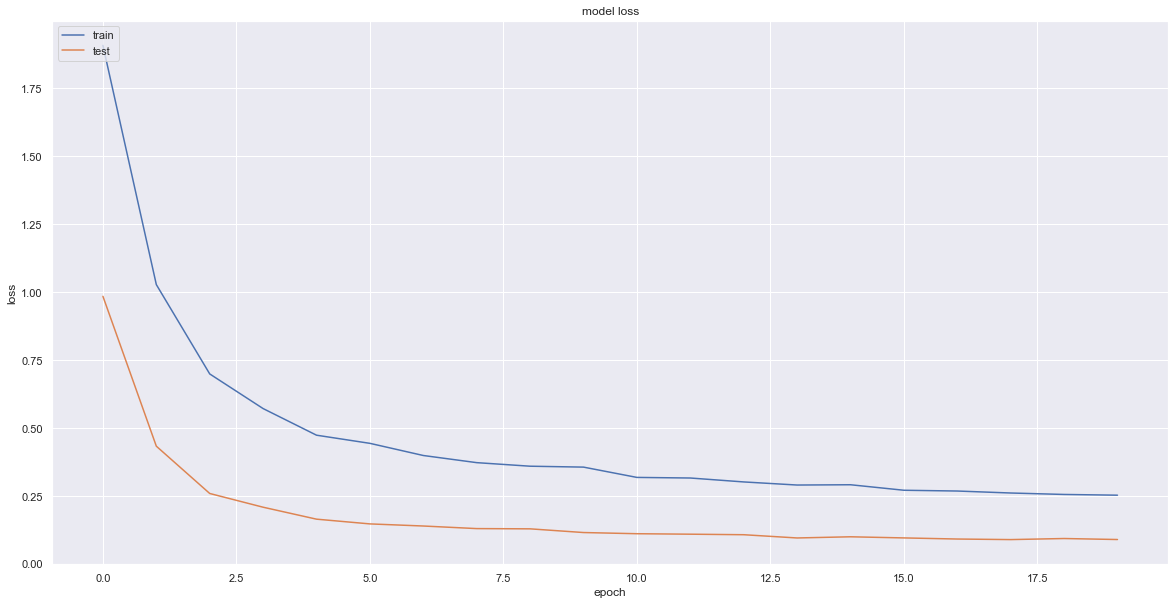

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('learning_curve')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model.evaluate(X_train , y_train)

919/919 [==============================] - 34s 36ms/step - loss: 0.0726 - accuracy: 0.9787


[0.07263214886188507, 0.978741466999054]

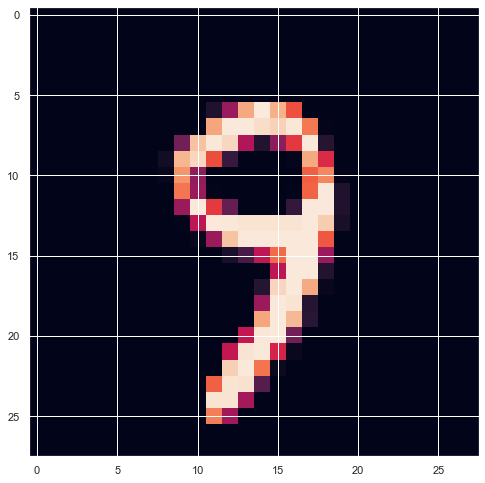

In [33]:
plt.imshow(X_test[333])

In [34]:
y_predicted = model.predict(X_test)

In [35]:
np.argmax(y_predicted[333])

9